## Dataset Creation after combining all the CSVs for model training

In [1]:
import pandas as pd
import os
import re

folder_path = "/kaggle/input/flexural-raw-data/Abhishek Raw Data"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dfs = []

# Robust function to extract pattern, density, and code
def extract_pattern_density_code(filename):
    name = filename.split('.')[0]  # remove extension
    match = re.match(r"([A-Z0-9]+?)(\d+)(\d{1,3})$", name)
    if match:
        pattern = match.group(1)
        density = int(match.group(2))
        code = int(match.group(3))
        return pattern, density, code
    else:
        print(f"Filename did not match expected pattern: {filename}")
        return None, None, None

for file in csv_files:
    df = pd.read_csv(os.path.join(folder_path, file))
    pattern, density, code = extract_pattern_density_code(file)
    df['Pattern'] = pattern
    df['Density'] = density
    df['Code'] = density*10 + code
    dfs.append(df)

master_df = pd.concat(dfs, ignore_index=True)

print("Master CSV created successfully!")
print(master_df.head())


Master CSV created successfully!
      Time Flexure extension Flexure load Flexure strain Flexure stress  \
0    (sec)              (mm)          (N)            (%)          (MPa)   
1  0.00000           0.00000      0.01663        0.00000        0.00998   
2  0.05000           0.00000      0.02967        0.00000        0.01780   
3  0.10000           0.00000      0.01669        0.00000        0.01001   
4  0.15000           0.00031      0.05049        0.00018        0.03029   

  Extension      Load Pattern  Density  Code  
0      (mm)       (N)     TRI       80   802  
1   0.00000  -0.01663     TRI       80   802  
2   0.00000  -0.02967     TRI       80   802  
3   0.00000  -0.01669     TRI       80   802  
4  -0.00031  -0.05049     TRI       80   802  


In [2]:
master_df.shape

(2027904, 10)

In [3]:
master_df.head(10)

,Time,Flexure extension,Flexure load,Flexure strain,Flexure stress,Extension,Load,Pattern,Density,Code
0,(sec),(mm),(N),(%),(MPa),(mm),(N),TRI,80,802
1,0.00000,0.00000,0.01663,0.00000,0.00998,0.00000,-0.01663,TRI,80,802
2,0.05000,0.00000,0.02967,0.00000,0.01780,0.00000,-0.02967,TRI,80,802
3,0.10000,0.00000,0.01669,0.00000,0.01001,0.00000,-0.01669,TRI,80,802
4,0.15000,0.00031,0.05049,0.00018,0.03029,-0.00031,-0.05049,TRI,80,802
5,0.20000,0.00047,0.06700,0.00027,0.04020,-0.00047,-0.06700,TRI,80,802
6,0.25000,0.00187,0.05096,0.00110,0.03057,-0.00187,-0.05096,TRI,80,802
7,0.30000,0.00328,0.03393,0.00192,0.02036,-0.00328,-0.03393,TRI,80,802
8,0.35000,0.00516,0.04957,0.00302,0.02974,-0.00516,-0.04957,TRI,80,802
9,0.40000,0.00734,0.05833,0.00430,0.03500,-0.00734,-0.05833,TRI,80,802


In [4]:
master_df['Density'].unique()  # Shows all unique densities

array([ 80, 100,  40,  20,  60])

In [5]:
master_df['Pattern'].unique()  # Shows all unique densities

array(['TRI', 'OCT', 'LIG', 'CON', 'GRI', 'LIN', 'C3D', 'CSD', 'QCU',
       'CRS', 'ZZG', 'THX', 'CUB', 'GYR'], dtype=object)

In [6]:
master_df['Code'].unique()

array([ 802, 1001, 1003,  402,  201,  803,  801,  202,  203,  603,  601,
       1002,  403,  602,  401])

In [7]:

import pandas as pd

# Assuming master_df is your dataframe
units_pattern = ['(sec)', '(mm)', '(N)', '(%)', '(MPa)', '(mm)', '(N)']

# Identify rows containing all the unit values
matching_rows = master_df.apply(lambda row: all(item in row.values for item in units_pattern), axis=1)

# Get the indices of these rows
row_indices = master_df.index[matching_rows].tolist()
print("Row indices containing units:", row_indices)

# Optionally, print the first few matching rows
print("\nSome matching rows:")
print(master_df.loc[row_indices].head())

Row indices containing units: [0, 9668, 20318, 30332, 40040, 49837, 59627, 66874, 76546, 86182, 96060, 107345, 121478, 128721, 140013, 147235, 158219, 175072, 184776, 192812, 202681, 212314, 220429, 230074, 239747, 247860, 259058, 270715, 280350, 290104, 299733, 308090, 318526, 328484, 338925, 346961, 359109, 368923, 379389, 389114, 398819, 408709, 418540, 428407, 436456, 446113, 455795, 465508, 477637, 487452, 497947, 505185, 513210, 523059, 534407, 542508, 553003, 562824, 572554, 583066, 592734, 600772, 610523, 621765, 631567, 641275, 650915, 659000, 669521, 677545, 688804, 700096, 707541, 718253, 727297, 737636, 745721, 755368, 765139, 775611, 785287, 794925, 805388, 813461, 824291, 832325, 843580, 851842, 861383, 872649, 882341, 893673, 904120, 914189, 922316, 930364, 937591, 944853, 961676, 971391, 981041, 989224, 999015, 1008684, 1018359, 1028898, 1038569, 1048348, 1058000, 1067866, 1077681, 1088179, 1095430, 1102652, 1112293, 1119531, 1130774, 1140425, 1147662, 1154724, 1162778,

In [8]:
master_df.loc[9668]    # by index label

Time                 (sec)
Flexure extension     (mm)
Flexure load           (N)
Flexure strain         (%)
Flexure stress       (MPa)
Extension             (mm)
Load                   (N)
Pattern                OCT
Density                 80
Code                   802
Name: 9668, dtype: object

In [9]:
master_df.shape

(2027904, 10)

In [10]:
import pandas as pd

# Define the units pattern
units_pattern = ['(sec)', '(mm)', '(N)', '(%)', '(MPa)', '(mm)', '(N)']

# Identify rows containing all unit values
matching_rows = master_df.apply(lambda row: all(item in row.values for item in units_pattern), axis=1)

# Drop these rows
df = master_df[~matching_rows].reset_index(drop=True)

print("Rows containing units have been removed. New dataframe shape:", df.shape)


Rows containing units have been removed. New dataframe shape: (2027694, 10)


In [11]:
df.head(10)

,Time,Flexure extension,Flexure load,Flexure strain,Flexure stress,Extension,Load,Pattern,Density,Code
0,0.00000,0.00000,0.01663,0.00000,0.00998,0.00000,-0.01663,TRI,80,802
1,0.05000,0.00000,0.02967,0.00000,0.01780,0.00000,-0.02967,TRI,80,802
2,0.10000,0.00000,0.01669,0.00000,0.01001,0.00000,-0.01669,TRI,80,802
3,0.15000,0.00031,0.05049,0.00018,0.03029,-0.00031,-0.05049,TRI,80,802
4,0.20000,0.00047,0.06700,0.00027,0.04020,-0.00047,-0.06700,TRI,80,802
5,0.25000,0.00187,0.05096,0.00110,0.03057,-0.00187,-0.05096,TRI,80,802
6,0.30000,0.00328,0.03393,0.00192,0.02036,-0.00328,-0.03393,TRI,80,802
7,0.35000,0.00516,0.04957,0.00302,0.02974,-0.00516,-0.04957,TRI,80,802
8,0.40000,0.00734,0.05833,0.00430,0.03500,-0.00734,-0.05833,TRI,80,802
9,0.45000,0.00953,0.08730,0.00558,0.05238,-0.00953,-0.08730,TRI,80,802


In [12]:
# Example: drop the column named 'Extension'
df = df.drop(columns=['Time','Code'])

# Verify
print(df.head())

  Flexure extension Flexure load Flexure strain Flexure stress Extension  \
0           0.00000      0.01663        0.00000        0.00998   0.00000   
1           0.00000      0.02967        0.00000        0.01780   0.00000   
2           0.00000      0.01669        0.00000        0.01001   0.00000   
3           0.00031      0.05049        0.00018        0.03029  -0.00031   
4           0.00047      0.06700        0.00027        0.04020  -0.00047   

       Load Pattern  Density  
0  -0.01663     TRI       80  
1  -0.02967     TRI       80  
2  -0.01669     TRI       80  
3  -0.05049     TRI       80  
4  -0.06700     TRI       80  


In [13]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [14]:
df

,Flexure extension,Flexure load,Flexure strain,Flexure stress,Extension,Load,Pattern,Density
0,5.09750,87.61620,2.98682,52.56971,-5.09750,-87.61619,CUB,80
1,20.62094,94.02350,12.08258,56.41410,-20.62094,-94.02350,CUB,100
2,2.57016,44.17989,1.50595,26.50793,-2.57016,-44.17988,OCT,100
3,10.31719,72.81451,6.04523,43.68870,-10.31719,-72.81451,QCU,20
4,3.91109,55.16191,2.29166,33.09715,-3.91109,-55.16191,LIN,60
...,...,...,...,...,...,...,...,...
2027689,0.18234,0.04409,0.10684,0.02646,-0.18234,-0.04409,LIN,60
2027690,9.14500,71.02377,5.35840,42.61426,-9.14500,-71.02377,CUB,20
2027691,4.03016,57.97430,2.36142,34.78458,-4.03016,-57.97430,ZZG,60
2027692,2.12766,34.03754,1.24667,20.42252,-2.12766,-34.03754,CUB,40


## Data Pre-Processing

### Conversion to float64

In [15]:
categorical_cols = ['Pattern']

for col in df.columns:
    if col not in categorical_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)
print(df.dtypes)

Flexure extension    float64
Flexure load         float64
Flexure strain       float64
Flexure stress       float64
Extension            float64
Load                 float64
Pattern               object
Density              float64
dtype: object


### Checking for null values

In [16]:
df.isna().sum()

Flexure extension    0
Flexure load         0
Flexure strain       0
Flexure stress       0
Extension            0
Load                 0
Pattern              0
Density              0
dtype: int64

In [17]:
df.nunique()

Flexure extension      86892
Flexure load         1720570
Flexure strain         86892
Flexure stress       1612720
Extension              86892
Load                 1746135
Pattern                   14
Density                    5
dtype: int64

### Outlier detection

In [18]:
numeric_cols = [
    "Flexure extension",
    "Flexure load",
    "Flexure strain",
    "Flexure stress",
    "Extension",
    "Load",
    "Density"
]

In [19]:
outlier_counts = []

for col in numeric_cols:
    for pattern_val, group in df.groupby('Pattern'):
        Q1 = group[col].quantile(0.25)
        Q3 = group[col].quantile(0.75)
        IQR = Q3 - Q1
        
        outliers = (group[col] < (Q1 - 1.5 * IQR)) | (group[col] > (Q3 + 1.5 * IQR))
        
        total_entries = group[col].notna().sum()
        count_outliers = outliers.sum()
        percentage_outliers = (count_outliers / total_entries) * 100
        
        outlier_counts.append([col, pattern_val, count_outliers, total_entries, percentage_outliers])

outlier_counts_df = pd.DataFrame(
    outlier_counts,
    columns=['Column', 'Pattern', 'Outlier Count', 'Total Entries', 'Outlier %']
)

print(outlier_counts_df)


               Column Pattern  Outlier Count  Total Entries  Outlier %
0   Flexure extension     C3D              0         116152   0.000000
1   Flexure extension     CON              0         145129   0.000000
2   Flexure extension     CRS           1201         129306   0.928805
3   Flexure extension     CSD              0         147876   0.000000
4   Flexure extension     CUB           5522         150828   3.661124
..                ...     ...            ...            ...        ...
93            Density     OCT              0         154391   0.000000
94            Density     QCU              0         156037   0.000000
95            Density     THX              0         150460   0.000000
96            Density     TRI              0         147668   0.000000
97            Density     ZZG              0         168006   0.000000

[98 rows x 5 columns]


In [20]:
outlier_counts = []

# Boolean mask to mark rows that have any outlier
outlier_mask = pd.Series(False, index=df.index)

for col in numeric_cols:
    for pattern_val, group in df.groupby('Pattern'):
        Q1 = group[col].quantile(0.25)
        Q3 = group[col].quantile(0.75)
        IQR = Q3 - Q1
        
        outliers = (group[col] < (Q1 - 1.5 * IQR)) | (group[col] > (Q3 + 1.5 * IQR))
        
        total_entries = group[col].notna().sum()
        count_outliers = outliers.sum()
        percentage_outliers = (count_outliers / total_entries) * 100
        
        outlier_counts.append([col, pattern_val, count_outliers, total_entries, percentage_outliers])
        
        # Mark these outliers in the global mask
        outlier_mask.loc[outliers.index] |= outliers

# Create the outlier counts DataFrame
outlier_counts_df = pd.DataFrame(
    outlier_counts,
    columns=['Column', 'Pattern', 'Outlier Count', 'Total Entries', 'Outlier %']
)

# Remove rows with at least one outlier
df_cleaned = df.loc[~outlier_mask].copy()

print(outlier_counts_df)
print(f"Original rows: {len(df)}, Cleaned rows: {len(df_cleaned)}")


               Column Pattern  Outlier Count  Total Entries  Outlier %
0   Flexure extension     C3D              0         116152   0.000000
1   Flexure extension     CON              0         145129   0.000000
2   Flexure extension     CRS           1201         129306   0.928805
3   Flexure extension     CSD              0         147876   0.000000
4   Flexure extension     CUB           5522         150828   3.661124
..                ...     ...            ...            ...        ...
93            Density     OCT              0         154391   0.000000
94            Density     QCU              0         156037   0.000000
95            Density     THX              0         150460   0.000000
96            Density     TRI              0         147668   0.000000
97            Density     ZZG              0         168006   0.000000

[98 rows x 5 columns]
Original rows: 2027694, Cleaned rows: 2010673


In [21]:
df.shape

(2027694, 8)

In [22]:
outlier_df.shape

NameError: name 'outlier_df' is not defined

In [23]:
df_cleaned.shape

(2010673, 8)

### Printing some of the outlier rows

In [24]:
df_cleaned

,Flexure extension,Flexure load,Flexure strain,Flexure stress,Extension,Load,Pattern,Density
0,5.09750,87.61620,2.98682,52.56971,-5.09750,-87.61619,CUB,80.0
2,2.57016,44.17989,1.50595,26.50793,-2.57016,-44.17988,OCT,100.0
3,10.31719,72.81451,6.04523,43.68870,-10.31719,-72.81451,QCU,20.0
4,3.91109,55.16191,2.29166,33.09715,-3.91109,-55.16191,LIN,60.0
5,11.40891,64.92645,6.68491,38.95587,-11.40891,-64.92645,CRS,20.0
...,...,...,...,...,...,...,...,...
2027689,0.18234,0.04409,0.10684,0.02646,-0.18234,-0.04409,LIN,60.0
2027690,9.14500,71.02377,5.35840,42.61426,-9.14500,-71.02377,CUB,20.0
2027691,4.03016,57.97430,2.36142,34.78458,-4.03016,-57.97430,ZZG,60.0
2027692,2.12766,34.03754,1.24667,20.42252,-2.12766,-34.03754,CUB,40.0


In [25]:
## Class balancing based on pattern
print("Rows per pattern:")
print(df['Pattern'].value_counts())

Rows per pattern:
Pattern
ZZG    168006
LIN    156334
QCU    156037
OCT    154391
LIG    151069
CUB    150828
THX    150460
CSD    147876
TRI    147668
CON    145129
CRS    129306
GYR    128377
GRI    126061
C3D    116152
Name: count, dtype: int64


## Balancing the dataframe

In [26]:
from sklearn.utils import resample

# Find the minimum class count in df_cleaned
min_count = df_cleaned['Pattern'].value_counts().min()

# Create a balanced dataframe by downsampling each pattern
balanced_df_list = []
for pattern_val, group in df_cleaned.groupby('Pattern'):
    balanced_group = resample(group, 
                              replace=False,  # no duplicate rows
                              n_samples=min_count, 
                              random_state=42)
    balanced_df_list.append(balanced_group)

# Combine all into one DataFrame
df_balanced = pd.concat(balanced_df_list)

# Shuffle the rows (optional but good practice)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['Pattern'].value_counts())

Pattern
C3D    116152
GRI    116152
LIN    116152
ZZG    116152
CON    116152
GYR    116152
QCU    116152
TRI    116152
CRS    116152
OCT    116152
CUB    116152
LIG    116152
THX    116152
CSD    116152
Name: count, dtype: int64


In [27]:
df_balanced.shape

(1626128, 8)

## Model Training

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()
df_balanced['Pattern'] = le.fit_transform(df_balanced['Pattern'])
scaler = StandardScaler()
df_balanced[numeric_cols] = scaler.fit_transform(df_balanced[numeric_cols])


## Balanced dataset

In [40]:
from sklearn.model_selection import train_test_split
X = df_balanced.drop('Pattern', axis=1)
y = df_balanced['Pattern']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1300902, 7)
(325226, 7)
(1300902,)
(325226,)


In [42]:
from sklearn.metrics import classification_report, accuracy_score

# Import all the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.metrics import accuracy_score, classification_report
from tqdm import trange, tqdm

from xgboost import XGBClassifier

# Example dataset (replace with your own)
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# X, y = load_iris(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=50,
        warm_start=True,
        random_state=42
    ),
    
    
    "XGBoost": XGBClassifier(
        n_estimators=50,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    ),

    "K-Nearest Neighbors": KNeighborsClassifier(
        n_neighbors=30,
        weights='distance',
        metric='euclidean'
    ),
    
    "Decision Tree": DecisionTreeClassifier(
        random_state=42
    ),
    
    "Extra Trees": ExtraTreesClassifier(
        n_estimators=10,
        random_state=42
    )
}

# Training loop
for name, model in tqdm(models.items(), desc="Training models"):
    print(f"\n--- {name} ---")
    
    # Incremental fitting for models with n_estimators
    if hasattr(model, "n_estimators"):
        n_estimators = model.n_estimators
        for i in trange(1, n_estimators + 1, desc=f"Training {name}"):
            model.set_params(n_estimators=i)
            model.fit(X_train, y_train)
    else:
        for _ in trange(1, 2, desc=f"Training {name}"):
            model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("="*40 + "\n")


Training models:   0%|          | 0/5 [00:00<?, ?it/s]


--- Random Forest ---



Training Random Forest: 100%|██████████| 50/50 [06:54<00:00,  8.30s/it]


Accuracy: 0.8238

Classification Report:


Training models:  20%|██        | 1/5 [07:07<28:30, 427.64s/it]

              precision    recall  f1-score   support

           0       0.83      0.86      0.85     23230
           1       0.84      0.84      0.84     23230
           2       0.80      0.83      0.81     23230
           3       0.78      0.79      0.78     23231
           4       0.82      0.81      0.81     23231
           5       0.82      0.84      0.83     23230
           6       0.80      0.81      0.81     23231
           7       0.90      0.90      0.90     23231
           8       0.85      0.84      0.84     23230
           9       0.82      0.81      0.81     23230
          10       0.81      0.79      0.80     23231
          11       0.82      0.81      0.81     23230
          12       0.82      0.80      0.81     23230
          13       0.83      0.81      0.82     23231

    accuracy                           0.82    325226
   macro avg       0.82      0.82      0.82    325226
weighted avg       0.82      0.82      0.82    325226



--- XGBoost ---



Training XGBoost: 100%|██████████| 50/50 [20:22<00:00, 24.46s/it]


Accuracy: 0.3550

Classification Report:


Training models:  40%|████      | 2/5 [27:33<44:51, 897.21s/it]

              precision    recall  f1-score   support

           0       0.19      0.80      0.31     23230
           1       0.75      0.51      0.61     23230
           2       0.33      0.42      0.37     23230
           3       0.41      0.21      0.28     23231
           4       0.54      0.23      0.32     23231
           5       0.29      0.46      0.35     23230
           6       0.28      0.22      0.25     23231
           7       0.51      0.66      0.57     23231
           8       0.58      0.26      0.36     23230
           9       0.45      0.27      0.33     23230
          10       0.43      0.22      0.29     23231
          11       0.34      0.26      0.30     23230
          12       0.37      0.27      0.31     23230
          13       0.61      0.19      0.29     23231

    accuracy                           0.35    325226
   macro avg       0.44      0.35      0.35    325226
weighted avg       0.44      0.35      0.35    325226



--- K-Nearest Neighbors


Training K-Nearest Neighbors: 100%|██████████| 1/1 [00:04<00:00,  4.58s/it]


Accuracy: 0.8200

Classification Report:


Training models:  60%|██████    | 3/5 [28:04<16:43, 501.76s/it]

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     23230
           1       0.87      0.83      0.85     23230
           2       0.77      0.87      0.82     23230
           3       0.79      0.77      0.78     23231
           4       0.83      0.79      0.81     23231
           5       0.80      0.86      0.83     23230
           6       0.78      0.82      0.80     23231
           7       0.90      0.90      0.90     23231
           8       0.85      0.82      0.84     23230
           9       0.83      0.79      0.81     23230
          10       0.81      0.77      0.79     23231
          11       0.80      0.80      0.80     23230
          12       0.82      0.79      0.81     23230
          13       0.84      0.77      0.81     23231

    accuracy                           0.82    325226
   macro avg       0.82      0.82      0.82    325226
weighted avg       0.82      0.82      0.82    325226



--- Decision Tree ---



Training Decision Tree: 100%|██████████| 1/1 [00:33<00:00, 33.31s/it]


Accuracy: 0.7868

Classification Report:


Training models:  80%|████████  | 4/5 [28:38<05:17, 317.20s/it]

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     23230
           1       0.82      0.81      0.81     23230
           2       0.78      0.78      0.78     23230
           3       0.75      0.75      0.75     23231
           4       0.77      0.77      0.77     23231
           5       0.79      0.79      0.79     23230
           6       0.77      0.76      0.76     23231
           7       0.87      0.87      0.87     23231
           8       0.81      0.81      0.81     23230
           9       0.77      0.76      0.77     23230
          10       0.76      0.76      0.76     23231
          11       0.77      0.78      0.78     23230
          12       0.77      0.77      0.77     23230
          13       0.78      0.79      0.78     23231

    accuracy                           0.79    325226
   macro avg       0.79      0.79      0.79    325226
weighted avg       0.79      0.79      0.79    325226



--- Extra Trees ---



Training Extra Trees: 100%|██████████| 10/10 [01:55<00:00, 11.55s/it]


Accuracy: 0.8368

Classification Report:


Training models: 100%|██████████| 5/5 [30:38<00:00, 367.63s/it]

              precision    recall  f1-score   support

           0       0.84      0.87      0.86     23230
           1       0.85      0.86      0.86     23230
           2       0.81      0.84      0.83     23230
           3       0.79      0.81      0.80     23231
           4       0.83      0.83      0.83     23231
           5       0.84      0.85      0.84     23230
           6       0.82      0.82      0.82     23231
           7       0.91      0.91      0.91     23231
           8       0.86      0.85      0.85     23230
           9       0.83      0.82      0.83     23230
          10       0.82      0.80      0.81     23231
          11       0.83      0.81      0.82     23230
          12       0.84      0.81      0.82     23230
          13       0.85      0.82      0.83     23231

    accuracy                           0.84    325226
   macro avg       0.84      0.84      0.84    325226
weighted avg       0.84      0.84      0.84    325226




## Applying PCA

In [29]:
df_cleaned1 = df_balanced.copy()

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Features for PCA
flexure_features = ['Flexure extension', 'Flexure load', 'Flexure strain', 'Flexure stress', "Extension", "Load", "Density"]

# 1. Standardize the features
scaler = StandardScaler()
flexure_scaled = scaler.fit_transform(df_cleaned1[flexure_features])

# 2. Apply PCA
pca = PCA(n_components=3)
flexure_pca = pca.fit_transform(flexure_scaled)

# 3. Convert PCA output to a DataFrame
pca_columns = ['Flexure_PC1', 'Flexure_PC2', 'Flexure_PC3']
flexure_pca_df = pd.DataFrame(flexure_pca, columns=pca_columns, index=df_cleaned1.index)  # <-- add index to align

# 4. Concatenate with the original DataFrame (dropping original Flexure features)
df_cleaned1 = pd.concat([df_cleaned1.drop(columns=flexure_features), flexure_pca_df], axis=1)

# Optional: check explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each PC:", explained_variance)
print("Total variance captured by 4 PCs:", explained_variance.sum())


Explained variance ratio of each PC: [0.78689059 0.14986973 0.06323967]
Total variance captured by 4 PCs: 0.9999999999997664


In [31]:
df_cleaned1

,Pattern,Flexure_PC1,Flexure_PC2,Flexure_PC3
0,0,-3.007116,-0.109848,0.309833
1,5,-1.949705,-0.247869,-0.284809
2,0,-4.268158,-1.322789,1.358090
3,8,1.552107,-1.563248,-0.605415
4,8,-0.114610,-0.181655,-0.545685
...,...,...,...,...
1626123,2,0.082532,-0.272947,-0.821895
1626124,12,2.331822,-0.501635,-0.016434
1626125,1,0.272289,-1.015924,-0.833300
1626126,5,0.248379,-0.257777,-0.822304


In [32]:
# df_cleaned1.drop('Flexure_PC4', axis=1, inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()
df_cleaned1['Pattern'] = le.fit_transform(df_cleaned1['Pattern'])
# scaler = StandardScaler()
# df_cleaned1[numeric_cols] = scaler.fit_transform(df_cleaned1[numeric_cols])

In [34]:
df_cleaned1.head()

,Pattern,Flexure_PC1,Flexure_PC2,Flexure_PC3
0,0,-3.007116,-0.109848,0.309833
1,5,-1.949705,-0.247869,-0.284809
2,0,-4.268158,-1.322789,1.358090
3,8,1.552107,-1.563248,-0.605415
4,8,-0.114610,-0.181655,-0.545685


In [35]:
from sklearn.model_selection import train_test_split
X = df_cleaned1.drop('Pattern', axis=1)
y = df_cleaned1['Pattern']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [36]:
# df_cleaned1= df_cleaned1.drop('Flexure_PC4', axis=1)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1300902, 3)
(325226, 3)
(1300902,)
(325226,)


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.metrics import accuracy_score, classification_report
from tqdm import trange, tqdm

from xgboost import XGBClassifier

# Example dataset (replace with your own)
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# X, y = load_iris(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=50,
        warm_start=True,
        random_state=42
    ),
    

    "XGBoost": XGBClassifier(
        n_estimators=50,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    ),

    "K-Nearest Neighbors": KNeighborsClassifier(
        n_neighbors=50,
        weights='distance',
        metric='euclidean'
    ),
    
    "Decision Tree": DecisionTreeClassifier(
        random_state=42
    ),
    
    "Extra Trees": ExtraTreesClassifier(
        n_estimators=50,
        random_state=42
    )
}

# Training loop
for name, model in tqdm(models.items(), desc="Training models"):
    print(f"\n--- {name} ---")
    
    # Incremental fitting for models with n_estimators
    if hasattr(model, "n_estimators"):
        n_estimators = model.n_estimators
        for i in trange(1, n_estimators + 1, desc=f"Training {name}"):
            model.set_params(n_estimators=i)
            model.fit(X_train, y_train)
    else:
        for _ in trange(1, 2, desc=f"Training {name}"):
            model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("="*40 + "\n")


Training models:   0%|          | 0/5 [00:00<?, ?it/s]


--- Random Forest ---



Training Random Forest: 100%|██████████| 50/50 [05:21<00:00,  6.43s/it]


Accuracy: 0.8697

Classification Report:


Training models:  20%|██        | 1/5 [05:35<22:22, 335.60s/it]

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     23230
           1       0.90      0.90      0.90     23230
           2       0.86      0.88      0.87     23230
           3       0.83      0.84      0.83     23231
           4       0.87      0.87      0.87     23231
           5       0.87      0.88      0.87     23230
           6       0.85      0.86      0.85     23231
           7       0.94      0.94      0.94     23231
           8       0.88      0.87      0.87     23230
           9       0.86      0.85      0.85     23230
          10       0.84      0.83      0.84     23231
          11       0.85      0.84      0.85     23230
          12       0.87      0.86      0.86     23230
          13       0.87      0.85      0.86     23231

    accuracy                           0.87    325226
   macro avg       0.87      0.87      0.87    325226
weighted avg       0.87      0.87      0.87    325226



--- XGBoost ---



Training XGBoost: 100%|██████████| 50/50 [18:15<00:00, 21.90s/it]


Accuracy: 0.3351

Classification Report:


Training models:  40%|████      | 2/5 [23:53<39:12, 784.18s/it]

              precision    recall  f1-score   support

           0       0.25      0.77      0.38     23230
           1       0.72      0.57      0.64     23230
           2       0.34      0.40      0.36     23230
           3       0.28      0.06      0.10     23231
           4       0.52      0.22      0.31     23231
           5       0.30      0.42      0.35     23230
           6       0.19      0.23      0.21     23231
           7       0.45      0.64      0.53     23231
           8       0.34      0.36      0.35     23230
           9       0.30      0.25      0.27     23230
          10       0.36      0.15      0.21     23231
          11       0.32      0.20      0.25     23230
          12       0.25      0.18      0.21     23230
          13       0.33      0.25      0.29     23231

    accuracy                           0.34    325226
   macro avg       0.36      0.34      0.32    325226
weighted avg       0.36      0.34      0.32    325226



--- K-Nearest Neighbors


Training K-Nearest Neighbors: 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]


Accuracy: 0.8133

Classification Report:


Training models:  60%|██████    | 3/5 [24:08<14:25, 432.66s/it]

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     23230
           1       0.87      0.82      0.85     23230
           2       0.76      0.87      0.81     23230
           3       0.78      0.77      0.77     23231
           4       0.83      0.78      0.80     23231
           5       0.78      0.87      0.82     23230
           6       0.77      0.82      0.80     23231
           7       0.89      0.90      0.90     23231
           8       0.85      0.81      0.83     23230
           9       0.83      0.77      0.80     23230
          10       0.81      0.76      0.78     23231
          11       0.79      0.80      0.79     23230
          12       0.82      0.78      0.80     23230
          13       0.84      0.76      0.80     23231

    accuracy                           0.81    325226
   macro avg       0.82      0.81      0.81    325226
weighted avg       0.82      0.81      0.81    325226



--- Decision Tree ---



Training Decision Tree: 100%|██████████| 1/1 [00:20<00:00, 20.28s/it]


Accuracy: 0.8428

Classification Report:


Training models:  80%|████████  | 4/5 [24:29<04:30, 270.23s/it]

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     23230
           1       0.89      0.88      0.88     23230
           2       0.85      0.85      0.85     23230
           3       0.80      0.81      0.80     23231
           4       0.84      0.84      0.84     23231
           5       0.85      0.84      0.84     23230
           6       0.82      0.82      0.82     23231
           7       0.92      0.93      0.93     23231
           8       0.85      0.85      0.85     23230
           9       0.82      0.82      0.82     23230
          10       0.81      0.80      0.81     23231
          11       0.82      0.82      0.82     23230
          12       0.83      0.83      0.83     23230
          13       0.83      0.83      0.83     23231

    accuracy                           0.84    325226
   macro avg       0.84      0.84      0.84    325226
weighted avg       0.84      0.84      0.84    325226



--- Extra Trees ---



Training Extra Trees: 100%|██████████| 50/50 [32:02<00:00, 38.44s/it]


Accuracy: 0.8768

Classification Report:


Training models: 100%|██████████| 5/5 [56:48<00:00, 681.62s/it]

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     23230
           1       0.91      0.91      0.91     23230
           2       0.87      0.88      0.87     23230
           3       0.84      0.85      0.84     23231
           4       0.87      0.87      0.87     23231
           5       0.88      0.89      0.88     23230
           6       0.86      0.86      0.86     23231
           7       0.94      0.94      0.94     23231
           8       0.88      0.88      0.88     23230
           9       0.87      0.86      0.86     23230
          10       0.85      0.84      0.85     23231
          11       0.86      0.85      0.85     23230
          12       0.87      0.86      0.87     23230
          13       0.88      0.87      0.87     23231

    accuracy                           0.88    325226
   macro avg       0.88      0.88      0.88    325226
weighted avg       0.88      0.88      0.88    325226




## Taking the most correlated ones

Correlation with target column:
Flexure strain       0.103244
Flexure extension    0.103244
Flexure stress       0.066560
Flexure load         0.066560
Density             -0.032552
Load                -0.066560
Extension           -0.103244
Name: Pattern, dtype: float64


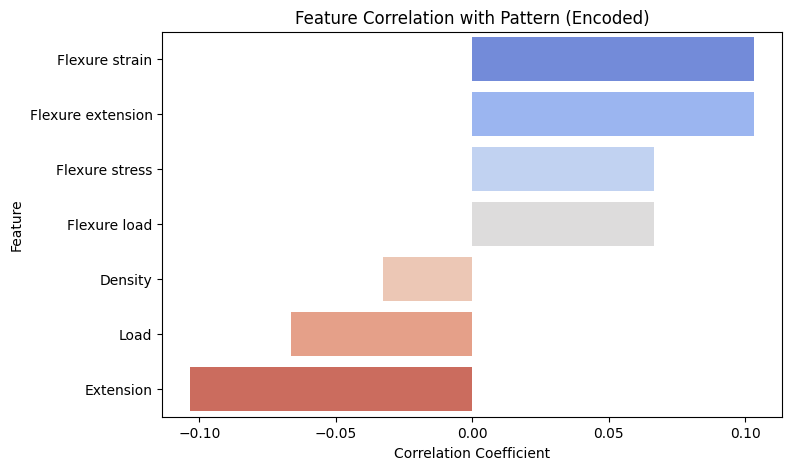

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your custom feature columns
columns_array = [
    "Flexure extension",
    "Flexure load",
    "Flexure strain",
    "Flexure stress",
    "Extension",
    "Load",
    "Density"
]

target_col = "Pattern"  # categorical target

# Encode the target
df_encoded = df_balanced.copy()
df_encoded[target_col] = df_encoded[target_col].astype('category').cat.codes

# Select only feature columns + target
subset = df_encoded[columns_array + [target_col]]

# Compute correlation with respect to target
corr_with_target = subset.corr()[target_col].drop(target_col).sort_values(ascending=False)

print("Correlation with target column:")
print(corr_with_target)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='coolwarm')
plt.title(f'Feature Correlation with {target_col} (Encoded)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()


In [75]:
# Example: choose specific columns you want
selected_columns = ['Flexure stress', 'Flexure strain','Pattern']  

# Create new DataFrame with only those columns
df_somefeatures = df_balanced[selected_columns].copy()


In [76]:
df_somefeatures

,Flexure stress,Flexure strain,Pattern
0,-1.335808,-1.124854,0
1,-0.655425,-0.940459,5
2,-2.118213,-1.472593,0
3,1.053744,0.119547,8
4,0.187928,-0.280590,8
...,...,...,...
1626123,0.387131,-0.319088,2
1626124,1.017148,0.847008,12
1626125,0.556219,-0.382637,1
1626126,0.453211,-0.249243,5


In [77]:
from sklearn.model_selection import train_test_split
X = df_somefeatures.drop('Pattern', axis=1)
y = df_somefeatures['Pattern']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1300902, 2)
(325226, 2)
(1300902,)
(325226,)


In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.metrics import accuracy_score, classification_report
from tqdm import trange, tqdm

from xgboost import XGBClassifier

# Example dataset (replace with your own)
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# X, y = load_iris(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=10,
        warm_start=True,
        random_state=42
    ),
    
    # "AdaBoost": AdaBoostClassifier(
    #     n_estimators=10,
    #     learning_rate=1.0,
    #     random_state=42
    # ),
    
    "XGBoost": XGBClassifier(
        n_estimators=10,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    ),

    "K-Nearest Neighbors": KNeighborsClassifier(
        n_neighbors=30,
        weights='distance',
        metric='euclidean'
    ),
    
    "Decision Tree": DecisionTreeClassifier(
        random_state=42
    ),
    
    "Extra Trees": ExtraTreesClassifier(
        n_estimators=20,
        random_state=42
    )
}

# Training loop
for name, model in tqdm(models.items(), desc="Training models"):
    print(f"\n--- {name} ---")
    
    # Incremental fitting for models with n_estimators
    if hasattr(model, "n_estimators"):
        n_estimators = model.n_estimators
        for i in trange(1, n_estimators + 1, desc=f"Training {name}"):
            model.set_params(n_estimators=i)
            model.fit(X_train, y_train)
    else:
        for _ in trange(1, 2, desc=f"Training {name}"):
            model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("="*40 + "\n")


Training models:   0%|          | 0/6 [00:00<?, ?it/s]


--- Random Forest ---



Training Random Forest: 100%|██████████| 10/10 [00:50<00:00,  5.06s/it]


Accuracy: 0.6251

Classification Report:


Training models:  17%|█▋        | 1/6 [00:54<04:32, 54.41s/it]

              precision    recall  f1-score   support

           0       0.60      0.67      0.63     23280
           1       0.61      0.65      0.63     23174
           2       0.57      0.62      0.59     23325
           3       0.60      0.62      0.61     23195
           4       0.62      0.62      0.62     23361
           5       0.62      0.65      0.64     23096
           6       0.57      0.58      0.57     23172
           7       0.69      0.69      0.69     23190
           8       0.69      0.66      0.67     23046
           9       0.63      0.60      0.61     23351
          10       0.62      0.59      0.60     23047
          11       0.65      0.61      0.63     23361
          12       0.62      0.58      0.60     23161
          13       0.68      0.61      0.64     23467

    accuracy                           0.63    325226
   macro avg       0.63      0.63      0.63    325226
weighted avg       0.63      0.63      0.63    325226



--- AdaBoost ---



Training AdaBoost: 100%|██████████| 10/10 [01:13<00:00,  7.36s/it]


Accuracy: 0.1413

Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Training models:  33%|███▎      | 2/6 [02:09<04:25, 66.49s/it]

              precision    recall  f1-score   support

           0       0.10      0.54      0.16     23280
           1       0.42      0.08      0.13     23174
           2       0.17      0.28      0.21     23325
           3       0.00      0.00      0.00     23195
           4       0.18      0.16      0.17     23361
           5       0.11      0.22      0.15     23096
           6       0.00      0.00      0.00     23172
           7       0.25      0.45      0.32     23190
           8       0.00      0.00      0.00     23046
           9       0.09      0.03      0.05     23351
          10       0.14      0.14      0.14     23047
          11       0.00      0.00      0.00     23361
          12       0.00      0.00      0.00     23161
          13       0.14      0.09      0.11     23467

    accuracy                           0.14    325226
   macro avg       0.11      0.14      0.10    325226
weighted avg       0.11      0.14      0.10    325226



--- XGBoost ---



Training XGBoost: 100%|██████████| 10/10 [00:50<00:00,  5.07s/it]


Accuracy: 0.2509

Classification Report:


Training models:  50%|█████     | 3/6 [03:01<02:59, 59.82s/it]

              precision    recall  f1-score   support

           0       0.16      0.77      0.27     23280
           1       0.36      0.28      0.32     23174
           2       0.25      0.32      0.28     23325
           3       0.32      0.18      0.23     23195
           4       0.38      0.24      0.30     23361
           5       0.17      0.16      0.17     23096
           6       0.26      0.14      0.18     23172
           7       0.33      0.50      0.40     23190
           8       0.45      0.18      0.26     23046
           9       0.30      0.17      0.22     23351
          10       0.23      0.12      0.16     23047
          11       0.22      0.18      0.20     23361
          12       0.36      0.14      0.20     23161
          13       0.53      0.11      0.19     23467

    accuracy                           0.25    325226
   macro avg       0.31      0.25      0.24    325226
weighted avg       0.31      0.25      0.24    325226



--- K-Nearest Neighbors


Training K-Nearest Neighbors: 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


Accuracy: 0.6535

Classification Report:


Training models:  67%|██████▋   | 4/6 [03:10<01:19, 39.69s/it]

              precision    recall  f1-score   support

           0       0.63      0.73      0.68     23280
           1       0.69      0.65      0.67     23174
           2       0.60      0.67      0.63     23325
           3       0.64      0.62      0.63     23195
           4       0.66      0.64      0.65     23361
           5       0.63      0.72      0.67     23096
           6       0.59      0.64      0.61     23172
           7       0.70      0.72      0.71     23190
           8       0.72      0.66      0.69     23046
           9       0.66      0.62      0.64     23351
          10       0.64      0.61      0.62     23047
          11       0.66      0.64      0.65     23361
          12       0.64      0.62      0.63     23161
          13       0.71      0.62      0.66     23467

    accuracy                           0.65    325226
   macro avg       0.66      0.65      0.65    325226
weighted avg       0.66      0.65      0.65    325226



--- Decision Tree ---



Training Decision Tree: 100%|██████████| 1/1 [00:12<00:00, 12.66s/it]


Accuracy: 0.6306

Classification Report:


Training models:  83%|████████▎ | 5/6 [03:23<00:30, 30.31s/it]

              precision    recall  f1-score   support

           0       0.65      0.64      0.64     23280
           1       0.64      0.64      0.64     23174
           2       0.60      0.60      0.60     23325
           3       0.61      0.61      0.61     23195
           4       0.63      0.63      0.63     23361
           5       0.63      0.64      0.64     23096
           6       0.58      0.58      0.58     23172
           7       0.69      0.69      0.69     23190
           8       0.67      0.68      0.67     23046
           9       0.62      0.62      0.62     23351
          10       0.61      0.61      0.61     23047
          11       0.63      0.63      0.63     23361
          12       0.61      0.60      0.61     23161
          13       0.65      0.64      0.65     23467

    accuracy                           0.63    325226
   macro avg       0.63      0.63      0.63    325226
weighted avg       0.63      0.63      0.63    325226



--- Extra Trees ---



Training Extra Trees: 100%|██████████| 20/20 [06:33<00:00, 19.70s/it]


Accuracy: 0.6218

Classification Report:


Training models: 100%|██████████| 6/6 [10:05<00:00, 100.85s/it]

              precision    recall  f1-score   support

           0       0.61      0.66      0.63     23280
           1       0.63      0.64      0.63     23174
           2       0.57      0.60      0.59     23325
           3       0.60      0.60      0.60     23195
           4       0.62      0.62      0.62     23361
           5       0.62      0.65      0.63     23096
           6       0.56      0.57      0.57     23172
           7       0.68      0.69      0.68     23190
           8       0.68      0.66      0.67     23046
           9       0.62      0.60      0.61     23351
          10       0.61      0.59      0.60     23047
          11       0.64      0.62      0.63     23361
          12       0.61      0.58      0.60     23161
          13       0.67      0.62      0.64     23467

    accuracy                           0.62    325226
   macro avg       0.62      0.62      0.62    325226
weighted avg       0.62      0.62      0.62    325226


